In [1]:
#Titanic
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)

In [2]:
os.chdir('D:\Titanic')

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


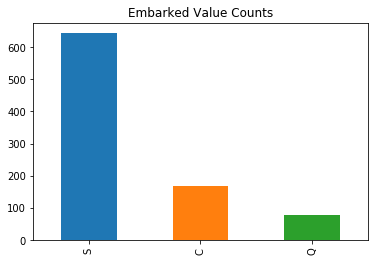

In [26]:
train_df.Embarked.value_counts().plot(kind='bar', title= 'Embarked Value Counts')

In [27]:
#Since "S" is by far the most common, I will fill the only two missing values in train_df.Embarked with "S"
train_df.Embarked.fillna("S", inplace=True)

In [28]:
train_df[train_df.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [29]:
#Cabin is mostly NaN values. Drop the column since there is no way to determine "best" cabin for passengers
train_df['InCabin'] = train_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1) 
train_df.drop('Cabin', axis=1, inplace=True)

In [30]:
train_df[train_df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,InCabin
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,1
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C,0


In [31]:
#fill NaN in train_df.Age based on the means of eax sex in train_df.Sex
train_df.Age = train_df.groupby('Sex').Age.transform(lambda x: x.fillna(x.median()))

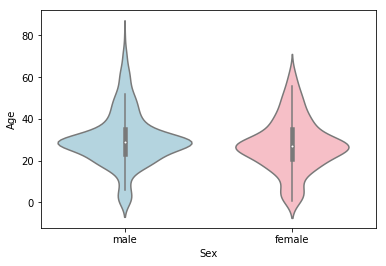

In [71]:
import seaborn as sns

sns.violinplot("Sex", "Age", data=train_df,
               palette=["lightblue", "lightpink"], )

In [32]:
#Double check missing values
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
InCabin        False
dtype: bool

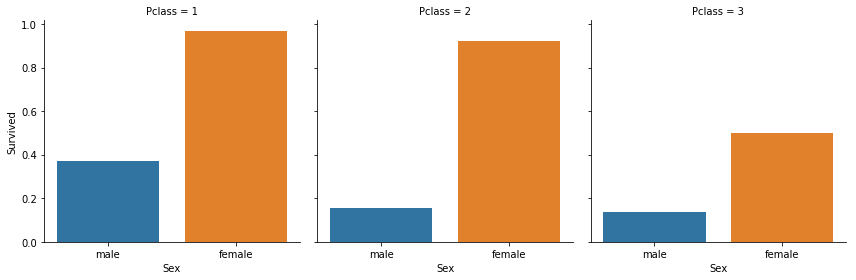

In [45]:
sex_survived = train_df.Sex.groupby(train_df.Survived).value_counts()

#Break down by M/F per class based on who survived
sns.factorplot(x='Sex', y='Survived', col='Pclass', 
               kind='bar', data=train_df, ci=None)

In [46]:
embarked_encoded, embarked_categories = train_df.Embarked.factorize()

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
embarked_onehot = encoder.fit_transform(embarked_encoded.reshape(-1,1)).toarray()
embarked_enc_df = pd.DataFrame(embarked_onehot, columns=['Embarked_S', 'Embarked_C', 'Embarked_Q'])

In [48]:
df_train = pd.concat([train_df, embarked_enc_df], axis=1)

In [49]:
#Use LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(train_df.Sex)

LabelEncoder()

In [50]:
list(le.classes_)

['female', 'male']

In [51]:
sex_encoded = le.transform(train_df.Sex)

df_train['Sex_Encoded'] = sex_encoded

In [52]:
corr_matrix = df_train.corr()

In [53]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
InCabin        0.316912
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.073296
Embarked_S    -0.149683
Pclass        -0.338481
Sex_Encoded   -0.543351
Name: Survived, dtype: float64

In [54]:
#Try to combine attributes
df_train['Family_Size'] = df_train.Parch + df_train.SibSp + 1

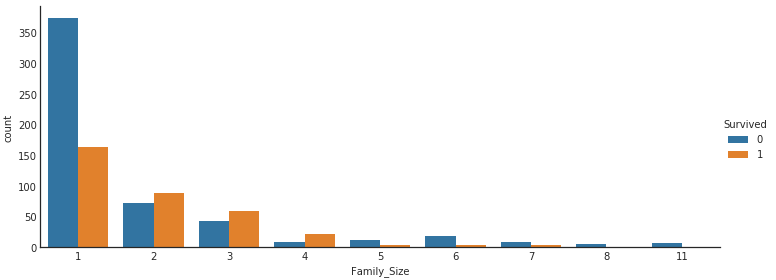

In [64]:
with sns.axes_style('white'):            
    g = sns.factorplot("Family_Size", data=df_train, aspect=2.5, kind='count',                               
                       hue='Survived')            

In [74]:
corr_matrix = df_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
InCabin        0.316912
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Family_Size    0.016639
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.073296
Embarked_S    -0.149683
Pclass        -0.338481
Sex_Encoded   -0.543351
Name: Survived, dtype: float64

In [75]:
#Drop columns that won't be used(ie. no correlation or have been replaced by encoding)

df_train.drop(['PassengerId', 'Name', 'Sex', 'SibSp','Parch', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [76]:
df_train.dtypes

Survived         int64
Pclass           int64
Age            float64
Fare           float64
InCabin          int64
Embarked_S     float64
Embarked_C     float64
Embarked_Q     float64
Sex_Encoded      int64
Family_Size      int64
dtype: object

In [77]:
train_set = df_train.values
train_set

array([[ 0.,  3., 22., ...,  0.,  1.,  2.],
       [ 1.,  1., 38., ...,  0.,  0.,  2.],
       [ 1.,  3., 26., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3., 27., ...,  0.,  0.,  4.],
       [ 1.,  1., 26., ...,  0.,  1.,  1.],
       [ 0.,  3., 32., ...,  1.,  1.,  1.]])

In [78]:
def clean(df):
    
    df.Embarked.fillna("S", inplace=True)
    
    df['InCabin'] = df['Cabin'].apply(lambda x: 0 if type(x) == float else 1) 
    df.drop('Cabin', axis=1, inplace=True)
    
    df.Age = df.groupby('Sex').Age.transform(lambda x: x.fillna(x.median()))
    
    df.Fare = df.groupby('Pclass').Fare.transform(lambda x: x.fillna(x.median()))
    
    embarked_enc, embarked_cat = df.Embarked.factorize()
    encoder = OneHotEncoder()
    embarked_oh = encoder.fit_transform(embarked_enc.reshape(-1,1)).toarray()
    embarked_enc = pd.DataFrame(embarked_oh, columns=['Embarked_S', 'Embarked_C', 'Embarked_Q'])
    
    df = pd.concat([df, embarked_enc], axis=1)
    
    le = preprocessing.LabelEncoder()
    sex_encoded = le.fit_transform(df.Sex.astype(str))
    df['Sex_Encoded'] = sex_encoded
    
    df['Famile_Size'] = df.Parch + df.SibSp + 1
    
    df.drop(['PassengerId', 'Name', 'Sex', 'SibSp','Parch', 'Ticket', 'Embarked'], axis=1, inplace=True)
    
    return df

In [79]:
test_df = pd.read_csv('test.csv')

test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [82]:
test_set = clean(test_df)

In [83]:
test_set.isnull().any()

Pclass         False
Age            False
Fare           False
InCabin        False
Embarked_S     False
Embarked_C     False
Embarked_Q     False
Sex_Encoded    False
Famile_Size    False
dtype: bool

In [84]:
from  sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, random_state=19,
                            n_jobs=-1)

In [85]:
# Training data features, skip the first column 'Survived'
train_features = train_set[:, 1:]

# 'Survived' column values
train_target = train_df.Survived.values

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0:.3g}".format(score)

'Mean accuracy of Random Forest: 0.982'

In [86]:
# Predict the Survival values for the test data
test_y = clf.predict(test_set)

In [87]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=11)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 9) (891,)
(712, 9) (712,)
(179, 9) (179,)


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [88]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.85


In [89]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix Results:")

print ("TP:", confusion_matrix[0, 0])
print ("FN:", confusion_matrix[0, 1])
print ("FP:", confusion_matrix[1, 0])
print ("TN:",confusion_matrix[1, 1])


Model Score 0.85 

Confusion Matrix Results:
TP: 107
FN: 11
FP: 15
TN: 46


In [90]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.91      0.89       118
    Survived       0.81      0.75      0.78        61

 avg / total       0.85      0.85      0.85       179



In [91]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', C=6, gamma=0.3)
svm_clf.fit(train_x, train_y)

SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
svm_clf.score(train_features, train_target)

0.9214365881032548

In [93]:
svm_predict_y = svm_clf.predict(test_x)
acc_score = accuracy_score(test_y, svm_predict_y)
print("Accuracy = {0:.3g}".format(acc_score))

Accuracy = 0.754


In [94]:
print(classification_report(test_y, 
                            svm_predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.78      0.88      0.83       118
    Survived       0.69      0.51      0.58        61

 avg / total       0.75      0.75      0.74       179



In [95]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
tree_clf.score(train_features, train_target)

0.8237934904601572

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(    
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],    
    voting='hard')
voting_clf.fit(train_x, train_y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [98]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):     
    clf.fit(train_x, train_y)    
    y_pred = clf.predict(test_x)
    print(clf.__class__.__name__, accuracy_score(test_y, y_pred))

LogisticRegression 0.8659217877094972
RandomForestClassifier 0.8659217877094972
SVC 0.7486033519553073
VotingClassifier 0.8770949720670391


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [99]:
y_hat_log = log_clf.predict(test_x)
acc_log = accuracy_score(test_y, y_hat_log)
acc_log

0.8659217877094972

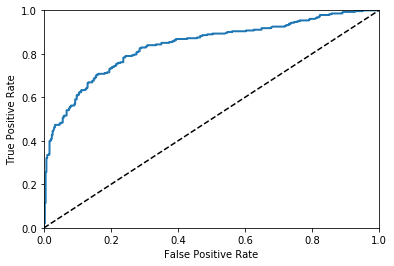

ROC AUC Score: 0.838


In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
y_probas_forest = cross_val_predict(log_clf, train_x, train_y, cv=3,                                    
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

fpr, tpr, thresholds = roc_curve(train_y, y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr,'Random Forest')
plt.show()

print("ROC AUC Score: {0:.3f}".format(roc_auc_score(train_y, y_scores_forest)))

In [102]:
## Bagging
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_x, train_y)
bag_y_hat = bag_clf.predict(test_x)

In [103]:
bag_accuracy = accuracy_score(test_y, bag_y_hat)

In [104]:
confusion_matrix = metrics.confusion_matrix(test_y, bag_y_hat)
print('The Bagging accuracy score: {0:.3f}'.format(bag_accuracy))

confusion_matrix

The Bagging accuracy score: 0.877


array([[111,   7],
       [ 15,  46]], dtype=int64)